# Метод Якоби

My time:  [0.06848502159118652, 0.09459257125854492, 0.21112680435180664, 0.3658890724182129, 0.5804665088653564]
lib_time:  [0.0674281120300293, 0.002400636672973633, 0.0054073333740234375, 0.012205123901367188, 0.019942283630371094]


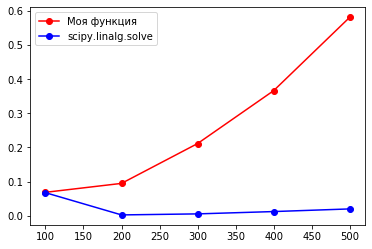

Оценим норму разности решений приведенной функции Якоби и библиотечной функции: 
0.022823887541959773


In [6]:
##### Метод Якоби итерационного решения СЛАУ #####

import numpy as np
from math import sqrt
import matplotlib.pyplot as plt
import time
import scipy.linalg

### Функция для вычисления одной итерации
def jacobi(A, f, x):
    n = f.size
    x_new = np.zeros(n)

    for i in range(n):

        tmp = f[i]
        for j in range(n):
            if i != j:
                tmp -= A[i][j] * x[j]
        x_new[i] = tmp / A[i][i]

    return x_new



### Вычисление корней в цикле по заданным начальному приближению
###      и точности

def my_solve(A, f):
    eps = 0.1        # Точность между двумя соседними приближениями
    n = f.size
    x = np.zeros(n)  # начальное приближение
    i = 0            # считаем количество итераций

    while True:
        i = i + 1
        x_new = jacobi(A, f, x)
        a = np.array(x_new)
        b = np.array(x)
        if np.linalg.norm(a-b) < eps:
            break
        x = x_new[:]

    return x_new


### Трансформация произвольной матрицы в матрицу
        ### с диагональным преобладанием
# Здесь суммируем модули всех элементов строки без диагонального
# Прибавляем эту сумму к диагональному элементу
def diag_domin(A, n):
    for i in range(n):
        s = 0
        for j in range(n):
            if i != j:
                s += abs(A[i][j])
        if (A[i][i] < 0):
            A[i][i] -= s
        else:
            A[i][i] += s
    return A


########## Проверка метода Якоби ##############

"""
 #  Пример из лекций
A = np.array([[2, -1, 0, -1],
              [0, 2, -1, 0],
              [-1, 1, 3, 0],
              [1, 0, -2, 4]])
f = np.array([4, 3, 2, 1])
n = f.size

x = solve(A, f)
print(x)
"""

### Реализация на матрицах 100, 200, 300 ... с диагональным преобладанием
def check_jacobi():
    n = 5
    my_time = [0] * n
    lib_time = [0] * n
    steps = [i*100 for i in range(1, n+1)]

    for i in range(0, n):
        size = 100 * (i+1)
        A = np.random.rand(size, size)
        f = np.random.rand(size)
        A = diag_domin(A, size)  # матрица должна иметь диагональное преобладание

        start_time = time.time()
        lib_x = scipy.linalg.solve(A, f) # библиотечное решение
        end_time = time.time()
        lib_time[i] = end_time - start_time

        start_time = time.time()
        my_x = my_solve(A, f)          # свое решение
        end_time = time.time()
        my_time[i] = end_time - start_time

    print('My time: ', my_time)
    print('lib_time: ', lib_time)

    plt.plot(steps, my_time, 'ro-', label='Моя функция')
    plt.plot(steps, lib_time, 'bo-', label='scipy.linalg.solve')
    plt.legend()

    plt.show()

    print('Оценим норму разности решений приведенной функции Якоби и библиотечной функции: ')
    err = np.linalg.norm(lib_x-my_x)
    print(err)


check_jacobi()

# Метод Зейделя

My time:  [0.1132657527923584, 0.3472766876220703, 0.76143479347229, 1.3721506595611572, 2.106255531311035]
lib_time:  [0.010288715362548828, 0.001825571060180664, 0.00409698486328125, 0.008838891983032227, 0.016474485397338867]


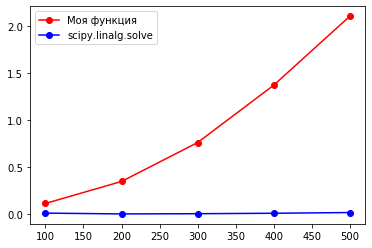

Оценим норму разности решений приведенной функции Зейделя и библиотечной функции: 
9.102837025732984e-05


In [7]:
##### Метод Зейделя итерационного решения СЛАУ #####

import numpy as np
import matplotlib.pyplot as plt
import time
import scipy.linalg


def seidel(A, f, x):

    n = f.size
    x_new = np.zeros(n)

    for i in range(n):
        s = 0
        for j in range(i):
            s = s + A[i][j] * x_new[j]
        for j in range(i+1, n):
            s = s + A[i][j] * x[j]
        x_new[i] = (f[i] - s) / A[i][i]

    return x_new



def my_solve(A, f):

    eps = 0.001    # Точность между двумя соседними приближениями
    n = f.size
    x = np.zeros(n)
    i = 0

    while True:
        i = i + 1
        x_new = seidel(A, f, x)
        a = np.array(x_new)
        b = np.array(x)
        if np.linalg.norm(a-b) < eps:
            break
        x = x_new[:]

    return x_new


def diag_domin(A, n):
    for i in range(n):
        s = 0
        for j in range(n):
            if i != j:
                s += abs(A[i][j])
        if (A[i][i] < 0):
            A[i][i] -= s
        else:
            A[i][i] += s
    return A


########## Проверка метода Зейделя ###############

"""
 #  Пример из лекций
A = np.array([[2, -1, 0, -1],
              [0, 2, -1, 0],
              [-1, 1, 3, 0],
              [1, 0, -2, 4]])
f = np.array([4, 3, 2, 1])
n = f.size

x = solve(A, f)
print(x)
"""

### Реализация на матрицах 100, 200, 300 ... с диагональным преобладанием
def check_seidel():
    n = 5
    my_time = [0] * n
    lib_time = [0] * n
    steps = [i*100 for i in range(1, n+1)]  # шаги - порядок матриц

    for i in range(0, n):
        size = 100 * (i+1)
        A = np.random.rand(size, size)
        f = np.random.rand(size)
        A = diag_domin(A, size)  # матрица должна иметь диагональное преобладание

        start_time = time.time()
        lib_x = np.linalg.solve(A, f) # библиотечное решение
        end_time = time.time()
        lib_time[i] = end_time - start_time

        start_time = time.time()
        my_x = my_solve(A, f)          # свое решение
        end_time = time.time()
        my_time[i] = end_time - start_time

    print('My time: ', my_time)
    print('lib_time: ', lib_time)

    plt.plot(steps, my_time, 'ro-', label='Моя функция')
    plt.plot(steps, lib_time, 'bo-', label='scipy.linalg.solve')
    plt.legend()

    plt.show()

    print('Оценим норму разности решений приведенной функции Зейделя и библиотечной функции: ')
    err = np.linalg.norm(lib_x-my_x)
    print(err)

    # варьируя eps, мы изменяем точность. Здесь время счета для eps=0.01 и eps=0.001
                    # почти одинаково, поэтому для улучшения точности примем eps=0.001
    

check_seidel()